# Superstore Profitability Analysis

This report presents a business-focused exploratory analysis of a fictional Superstore dataset.  
The objective is to understand **where profit is created or lost** across categories, regions, and customers, and to highlight opportunities for improvement.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Global Color & Style Strategy
color_single = "#4C72B0"                        # single-variable plots
palette_category = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]   # category-level comparisons
palette_corr = "coolwarm"                        # correlation/heatmaps

sns.set_style("whitegrid")

# Load dataset
df = pd.read_csv("Superstore.csv", encoding="latin1")

# Ensure date columns are parsed
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 1. Executive KPIs

In [2]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

df['Profit Margin'] = df['Profit'] / df['Sales']
overall_margin = total_profit / total_sales

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {overall_margin:.2%}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


### Interpretation

- The business generates **strong total sales**, but the **overall profit margin is modest**.  
- This suggests that while revenue volume is high, **costs, discounts, or low-margin products** may be limiting profitability.  
- Understanding *where* profit is created or eroded is key to improving margins without necessarily increasing volume.


## 2. Data Structure Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
Profit Margin,9994.0,0.120314,-2.75,0.075,0.27,0.3625,0.5,0.466754


### Interpretation

- The dataset contains detailed information at the **order-line level**, including sales, profit, discount, quantity, product, and geography.  
- Both **Sales** and **Profit** show a wide range of values, and the presence of **negative profits** confirms that certain transactions are loss-making.  
- This structure supports analysis at multiple levels: **category**, **region**, **customer**, and **product**.


## 3. High-Level Financial Distributions

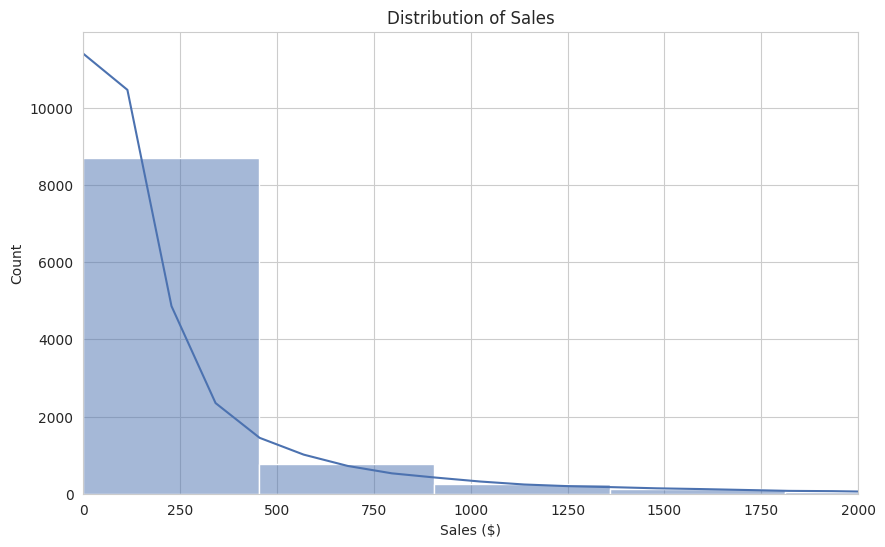

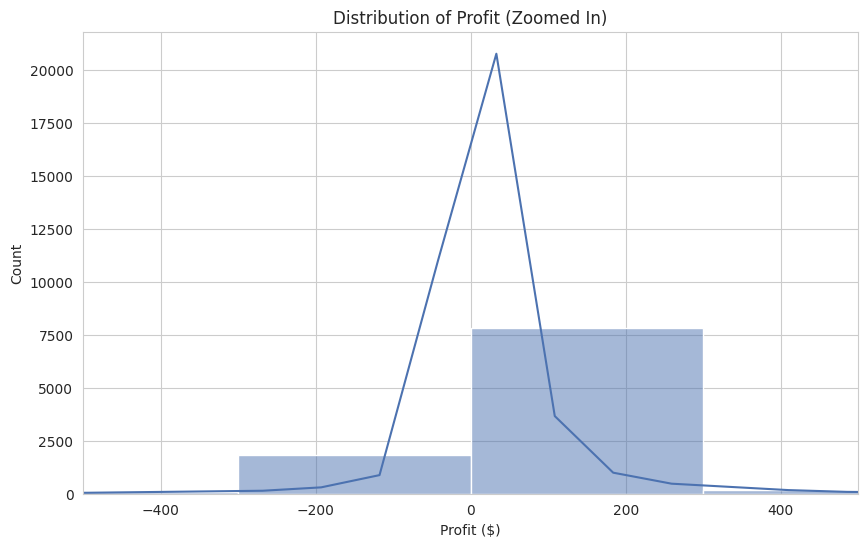

In [5]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True, color=color_single)
plt.title('Distribution of Sales')
plt.xlabel('Sales ($)')
plt.xlim(0, 2000)
plt.show()

# Profit distribution (zoomed)
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=50, kde=True, color=color_single)
plt.title('Distribution of Profit (Zoomed In)')
plt.xlabel('Profit ($)')
plt.xlim(-500, 500)
plt.show()

### Interpretation

- **Sales** are heavily **right-skewed**: most order lines are relatively small, with a long tail of larger orders above \$2,000.  
- **Profit** is concentrated around zero, with a substantial number of **low-profit and negative-profit** lines.  
- This confirms that improving profitability likely requires **fewer loss-making orders** and **better margin management**, rather than simply “more sales.”


## 4. Category-Level Profit Structure

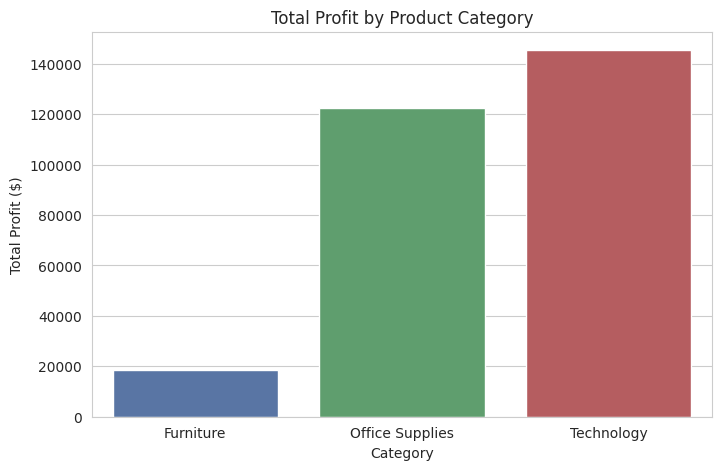

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [ ]:
sales_by_category = (
    df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit'))

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_category.reset_index(),x='Category', y='Profit',palette=palette_category,hue='Category')
plt.title('Total Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.show()

sales_by_category

### Interpretation

- **Technology** is the strongest contributor to total profit, followed by **Office Supplies**.  
- **Furniture** generates substantial sales but delivers **significantly lower profit**, indicating weaker margins or higher associated costs.  
- Furniture is the best candidate for **pricing, discount, and cost-structure review**.


## 5. Sub-Category Profitability Deep Dive

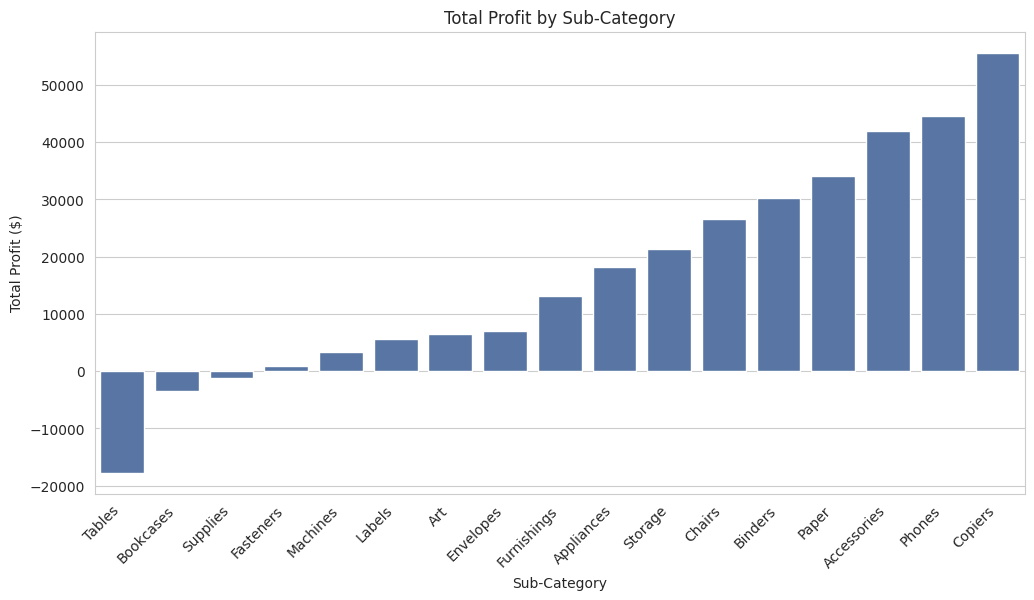

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

In [ ]:
profit_by_sub = (df.groupby('Sub-Category')['Profit'].sum().sort_values())

plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_sub.index, y=profit_by_sub.values, color=color_single)
plt.xticks(rotation=45, ha='right')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit ($)')
plt.show()

profit_by_sub

### Interpretation

- Within **Furniture**, sub-categories like **Tables** and **Bookcases** appear among the **largest loss-makers**.  
- Profitability varies significantly by sub-category, even within the same parent category.  
- This suggests that category-level decisions should be **informed by sub-category performance** rather than focusing on category-level performance.


## 6. Regional and State-Level Performance

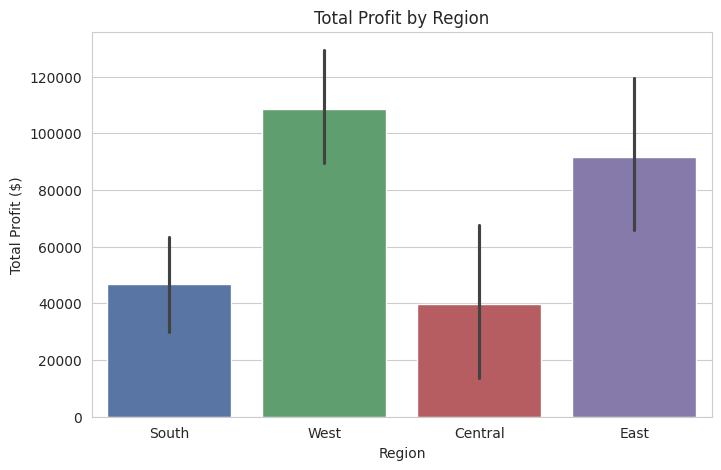

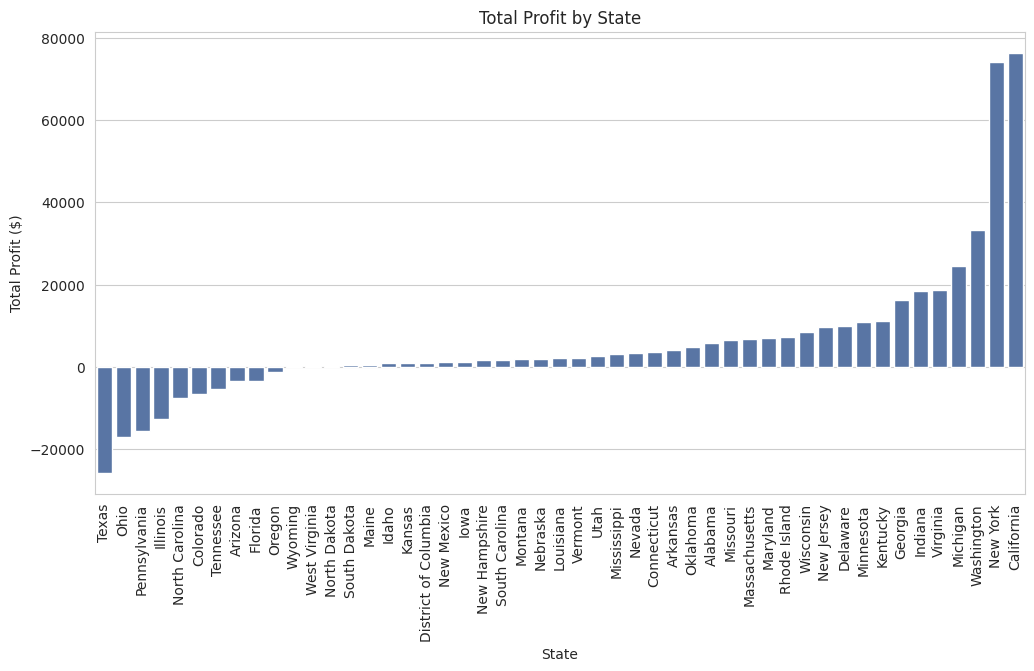

In [30]:
# Profit by region
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum,
            hue='Region', dodge=False, palette=palette_category)
plt.title('Total Profit by Region')
plt.ylabel('Total Profit ($)')
plt.show()

# Profit by state
state_profit = df.groupby('State')['Profit'].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_profit.index, y=state_profit.values, color=color_single)
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit ($)')
plt.show()

### Interpretation

- At the **regional level**, some regions consistently outperform others in terms of total profit.  
- At the **state level**, a subset of states generate **disproportionate losses**, which may be driven by local demand, shipping costs, or product mix.  
- These findings support a **geography-aware strategy**: high-performing states can be reinforced, while low-performing ones warrant deeper investigation.


## 7. Delivery Time and Operational Performance

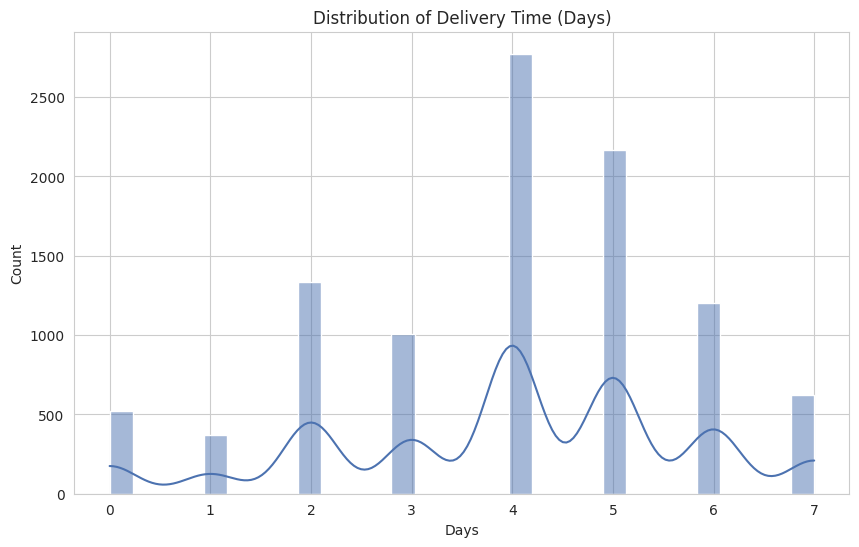

Average Delivery Time: 3.96 days


In [13]:
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery Time'], bins=30, kde=True, color=color_single)
plt.title('Distribution of Delivery Time (Days)')
plt.xlabel('Days')
plt.show()

avg_delivery = df['Delivery Time'].mean()
print(f"Average Delivery Time: {avg_delivery:.2f} days")

### Interpretation

- Most orders are delivered within **a few days**, with the average delivery time around the 2–5 day range.  
- While this analysis does not directly link delivery time to profit, the current performance appears **operationally reasonable**.  
- A future extension could compare **delivery time vs. customer segment or profit** to identify any hidden service-cost tradeoffs.


## 8. Customer-Level Profitability

In [14]:
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values()

top_10_customers = customer_profit.tail(10)
bottom_10_customers = customer_profit.head(10)

print("Top 10 Most Profitable Customers:")
display(top_10_customers)

print("\nTop 10 Least Profitable Customers:")
display(bottom_10_customers)

Top 10 Most Profitable Customers:


Customer Name
Daniel Raglin           2869.0760
Andy Reiter             2884.6208
Keith Dawkins           3038.6254
Christopher Martinez    3899.8904
Tom Ashbrook            4703.7883
Adrian Barton           5444.8055
Hunter Lopez            5622.4292
Sanjit Chand            5757.4119
Raymond Buch            6976.0959
Tamara Chand            8981.3239
Name: Profit, dtype: float64


Top 10 Least Profitable Customers:


Customer Name
Cindy Stewart      -6626.3895
Grant Thornton     -4108.6589
Luke Foster        -3583.9770
Sharelle Roach     -3333.9144
Henry Goldwyn      -2797.9635
Nathan Cano        -2204.8072
Sean Braxton       -2082.7451
Sean Miller        -1980.7393
Christine Phan     -1850.3029
Natalie Fritzler   -1695.9714
Name: Profit, dtype: float64

### Interpretation

- A **small set of customers** generates a **disproportionate share of total profit**, which is typical in many retail businesses.  
- The **least profitable customers** often drive repeated small losses, likely due to orders concentrated in **low-margin or high-cost products**.  
- These insights support more targeted strategies, such as **tiered promotions, differentiated service levels, or revised discount policies** for specific customer groups.


## 9. Products Driving Customer-Level Losses

In [15]:
loss_items = (
    df[df['Customer Name'].isin(bottom_10_customers.index)]
    .groupby('Product Name')['Profit']
    .sum()
    .sort_values()
    .head(10)
)

loss_items

Product Name
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
Lexmark MX611dhe Monochrome Laser Printer                                     -3909.9770
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
GBC DocuBind P400 Electric Binding System                                     -3701.8928
Ibico EPK-21 Electric Binding System                                          -2929.4845
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -2287.7820
Cisco TelePresence System EX90 Videoconferencing Unit                         -1811.0784
GBC DocuBind TL300 Electric Binding System                                    -1031.5385
Epson TM-T88V Direct Thermal Printer - Monochrome - Desktop                    -935.9595
StarTech.com 10/100 VDSL2 Ethernet Extender Kit                                -559.3560
Name: Profit, dtype: float64

### Interpretation

- The **least profitable customers** tend to purchase items that are **already structurally unprofitable**, particularly within Furniture.  
- This reinforces the finding that certain products are **consistently margin-dilutive**, regardless of who buys them.  
- Prioritizing **pricing, shipping, or assortment changes** for these products could improve profitability without affecting overall sales volume.


## 10. Correlation Overview

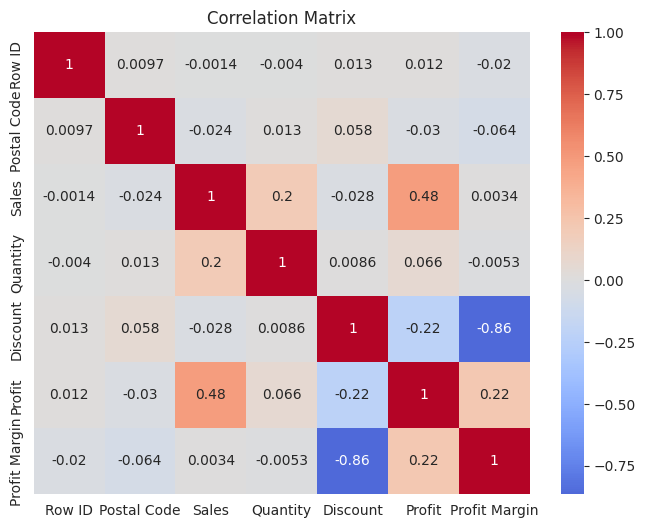

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=palette_corr, center=0)
plt.title('Correlation Matrix')
plt.show()

### Interpretation

- Correlations between **Sales, Profit, Quantity, and Discount** are generally weak to moderate.  
- This suggests that profit is influenced by a combination of **product type, discounting, geography, and customer behavior**, rather than a singular variable.  
- This motivates more advanced techniques (e.g., segmentation or predictive modeling) for future work.


# 11. Key Findings and Recommendations

### Key Findings

- **Technology** is the strongest profit-driving category, while **Furniture** contains several consistently unprofitable sub-categories.  
- **Profit is uneven across states and regions**, with some geographies generating persistent losses.  
- A small group of **high-value customers** contributes heavily to profit, while the **least profitable customers** frequently purchase low-margin products.  
- Delivery times appear reasonable overall, and do not immediately suggest a logistics issue.

### Recommendations

1. **Furniture Margin Review**  
   - Reassess pricing, discounts, and vendor costs for loss-making Furniture sub-categories (especially Tables and Bookcases).  

2. **Geographic Focus**  
   - Deep-dive into consistently unprofitable states to understand whether product mix, discounting, or logistics are driving losses.  

3. **Customer Strategy**  
   - Consider differentiated strategies for **top customers** (loyalty, targeted offers) and **least profitable customers** (more disciplined discounting or adjusted service levels).  

4. **Product Portfolio Optimization**  
   - Flag persistently unprofitable products for potential discontinuation, redesign, or price adjustment.

